In [1]:
%pylab inline
from datascience import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

Populating the interactive namespace from numpy and matplotlib


# Notes

- Changed all [he, she] into [he/ she]
- Changed all [itself, themselves] to [itself/ themselves]

In [6]:
with open('../Scrape-etcsl/Cleaned/c.1.8.2.4.txt', 'r') as text_file:
    enmerkar = text_file.read()

In [7]:
enmerkar_list = enmerkar.split(':')
enmerkar_list = [word for word in enmerkar_list if '[' in word]

In [9]:
etcsl_words = re.findall(r"(?<=\[)(.*?)(?=\])", enmerkar)
etcsl_words = [word for word in etcsl_words if word != '1']
etcsl_words

['brick',
 'mountain',
 'multicoloured',
 'leave',
 'city',
 'sky',
 'place',
 'grow',
 'name',
 'rainbow',
 'sky',
 'follow',
 'brilliance',
 'speckled',
 'sky',
 'stand',
 'moon',
 'new',
 'be',
 'Being',
 'big',
 'magnificence',
 'build',
 'mountain',
 'pure',
 'sun',
 'good',
 'place',
 'place',
 'moon',
 'land',
 'leave',
 'sun',
 'shine',
 'land',
 'horn',
 'equal',
 'cow',
 'cow',
 'plenty',
 'leave',
 'mouth',
 'cut',
 'mountain',
 'approach',
 'splendor',
 'metal',
 'right',
 'textile',
 'cover',
 'flax',
 'spread',
 'sun',
 'sun',
 'lord',
 'night',
 'sanctum',
 'king',
 'secretary',
 'lord',
 'secretary',
 'name',
 'be',
 'secretary',
 'lord',
 'name',
 'lord',
 'exalted',
 'he',
 'prince',
 'exalted',
 'he',
 'lord',
 'exalted',
 'he',
 'prince',
 'exalted',
 'he',
 'lord',
 'exalted',
 'he',
 'prince',
 'exalted',
 'he',
 'person',
 'deity',
 'bear',
 'he',
 'person',
 'deity',
 'branch',
 'leave',
 'he',
 'lord',
 'lord',
 'he',
 'contest',
 'speak',
 'lord',
 'eye',
 'ey

In [26]:
Enmerkar_table = Table.read_table('../Scrape-etcsl/Cleaned/c.1.8.2.4.txt', sep = ',')
Enmerkar_table = Enmerkar_table.drop(['text_name', 'etcsl_no'])
Enmerkar_table.show()

version,l_no,text
nan,A1,sux:šeg[brick]N sux:kur[mountain]N sux:šuba[multicoloure ...
nan,A2,sux:Kulaba[1]SN sux:iri[city]N sux:an[sky]N sux:ki[place ...
nan,A3,sux:Unug[1]SN sux:mu[name]N sux:tirana[rainbow]N
nan,A4,sux:an[sky]N sux:us[follow]V/t sux:simuš[brilliance]N su ...
nan,A5,sux:an[sky]N sux:gub[stand]V/i sux:usakar[moon]N sux:gib ...
nan,A6,sux:me[Being]N sux:gal[big]V/i sux:namnun[magnificence]N ...
nan,A7,sux:kur[mountain]N sux:sikil[pure]V/i sux:ud[sun]N sux:d ...
nan,A8,sux:itud[moon]N sux:kalam[land]N sux:e[leave]V/i
nan,A9,sux:ud[sun]N sux:zalag[shine]V/i sux:kalam[land]N sux:si ...
nan,A10,sux:abur[cow]N sux:abšar[cow]N sux:henun[plenty]N sux:e[ ...


In [28]:
def remove_space_from_labels(table):
    for label in table.labels:
        table.relabel(label, label.replace(' ', ''))
    return table

Enmerkar_table = remove_space_from_labels(Enmerkar_table)

In [29]:
#drop rows of different translations
to_be_dropped = []
for i in Enmerkar_table['l_no']:
    if re.search('[a-zA-Z]$', i):
        to_be_dropped.append(False)
    else:
        to_be_dropped.append(True)
Enmerkar_table = Enmerkar_table.where(to_be_dropped)

Enmerkar_table.labels
Enmerkar_table.show()

version,l_no,text
nan,A1,sux:šeg[brick]N sux:kur[mountain]N sux:šuba[multicoloure ...
nan,A2,sux:Kulaba[1]SN sux:iri[city]N sux:an[sky]N sux:ki[place ...
nan,A3,sux:Unug[1]SN sux:mu[name]N sux:tirana[rainbow]N
nan,A4,sux:an[sky]N sux:us[follow]V/t sux:simuš[brilliance]N su ...
nan,A5,sux:an[sky]N sux:gub[stand]V/i sux:usakar[moon]N sux:gib ...
nan,A6,sux:me[Being]N sux:gal[big]V/i sux:namnun[magnificence]N ...
nan,A7,sux:kur[mountain]N sux:sikil[pure]V/i sux:ud[sun]N sux:d ...
nan,A8,sux:itud[moon]N sux:kalam[land]N sux:e[leave]V/i
nan,A9,sux:ud[sun]N sux:zalag[shine]V/i sux:kalam[land]N sux:si ...
nan,A10,sux:abur[cow]N sux:abšar[cow]N sux:henun[plenty]N sux:e[ ...


In [30]:
proper_nouns = {
'CN': 'Constellation Name (star)',
'DN': 'Deity Name',
'EN': 'Ethnicity Name',
'FN': 'Field Name',
'GN': 'Geographical Name (for regions and countries)',
'MN': 'Month Name',
'ON': 'Object Name (usually for objects associated with a god)',
'PN': 'Personal Name',
'RN': 'Royal Name',
'SN': 'Settlement Name',
'TN': 'Temple Name',
'WN': 'Water Name',
}

simple_terms = {
    'AJ': 'Adjective',
    'AV': 'Adverb',
    'C': 'Conjunction',
    'N': 'Noun',
    'NU': 'Number',
    'PD': 'Part of Speech',
    'V': 'Verb',
}

In [31]:
def term_finder (line):
    #returns the meanings of words in a line of text
    terms = re.findall(r"(?<=\[)(.*?)(?=\])", line)
    return terms

def proper_noun_finder(line):
    #returns a list of all the proper nouns in a line of text
    nouns = re.findall(r"(?<=\:)(.*?)(?=\[)", line)
    nouns = [word for word in nouns if (len(word) > 1 and word[0].isupper() and not word[1].isupper())]
    return nouns

def speech_article_finder(line, proper_noun_filter = True):
    #returns the speech articles for proper_nouns or all words
    terms = re.findall(r"(?<=\])(.*?)(?=\s)", line)
    if proper_noun_filter:
        articles = [term for term in terms if term in proper_nouns]
    else: 
        articles = terms
    return articles


In [32]:
Enmerkar_table = Enmerkar_table.with_columns([
    'terms', Enmerkar_table.apply(term_finder, 'text'), 
    'proper_nouns', Enmerkar_table.apply(proper_noun_finder, 'text'), 
    'speech_articles', Enmerkar_table.apply(speech_article_finder, 'text')
    ])

Enmerkar_table.show()

version,l_no,text,terms,proper_nouns,speech_articles
nan,A1,sux:šeg[brick]N sux:kur[mountain]N sux:šuba[multicoloure ...,"['brick', 'mountain', 'multicoloured', 'leave']",[],[]
nan,A2,sux:Kulaba[1]SN sux:iri[city]N sux:an[sky]N sux:ki[place ...,"['1', 'city', 'sky', 'place', 'grow']",['Kulaba'],['SN']
nan,A3,sux:Unug[1]SN sux:mu[name]N sux:tirana[rainbow]N,"['1', 'name', 'rainbow']",['Unug'],['SN']
nan,A4,sux:an[sky]N sux:us[follow]V/t sux:simuš[brilliance]N su ...,"['sky', 'follow', 'brilliance', 'speckled']",[],[]
nan,A5,sux:an[sky]N sux:gub[stand]V/i sux:usakar[moon]N sux:gib ...,"['sky', 'stand', 'moon', 'new', 'be']",[],[]
nan,A6,sux:me[Being]N sux:gal[big]V/i sux:namnun[magnificence]N ...,"['Being', 'big', 'magnificence', 'build']",[],[]
nan,A7,sux:kur[mountain]N sux:sikil[pure]V/i sux:ud[sun]N sux:d ...,"['mountain', 'pure', 'sun', 'good', 'place', 'place']",[],[]
nan,A8,sux:itud[moon]N sux:kalam[land]N sux:e[leave]V/i,"['moon', 'land', 'leave']",[],[]
nan,A9,sux:ud[sun]N sux:zalag[shine]V/i sux:kalam[land]N sux:si ...,"['sun', 'shine', 'land', 'horn', 'equal']",[],[]
nan,A10,sux:abur[cow]N sux:abšar[cow]N sux:henun[plenty]N sux:e[ ...,"['cow', 'cow', 'plenty', 'leave']",[],[]


In [33]:
def partitioning(line_no):
    
    ln = int(''.join(c for c in line_no if c.isdigit()))

    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    
    elif (ln <= 39):
        return "2.1.1"
    elif (ln <= 51):
        return "2.1.2"
    elif (ln <= 69):
        return "2.1.3"
    
    elif (ln <= 76):
        return "2.2.1"
    elif (ln <= 90):
        return "2.2.2"
    elif (ln <= 113):
        return "2.2.3"
    
    elif (ln <= 127):
        return "2.3.1"
    elif (ln <= 132):
        return "2.3.2"
    elif (ln <= 134):
        return "2.3.3"
    
    elif (ln <= 138):
        return "3.1.1"
    elif (ln <= 149):
        return "3.1.2"
    elif (ln <= 162):
        return "3.1.3"
    elif (ln <= 169):
        return "3.1.4"
    
    elif (ln <= 184):
        return "3.2.1"
    elif (ln <= 197):
        return "3.2.2"
    elif (ln <= 205):
        return "3.2.3"
    elif (ln <= 210):
        return "3.2.4"
    elif (ln <= 221):
        return "3.2.5"
    
    elif (ln <= 227):
        return "4.1"
    
    elif (ln <= 248):
        return "4.2.1"
    elif (ln <= 254):
        return "4.2.2"
    elif (ln <= 263):
        return "4.2.3"
    elif (ln <= 273):
        return "4.2.4"
    
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "B"
    return "0"

def small_partition(line_no):
    ln = int(''.join(c for c in line_no if c.isdigit()))
    if(ln <= 13):
        return "1.1"
    elif (ln <= 21):
        return "1.2"
    elif (ln <= 69):
        return "2.1"
    elif (ln <= 113):
        return "2.2"
    elif (ln <= 134):
        return "2.3"
    elif (ln <= 169):
        return "3.1"
    elif (ln <= 221):
        return "3.2"
    elif (ln <= 227):
        return "4.1"
    elif (ln <= 273):
        return "4.2"
    elif (ln <= 280):
        return "5.1"
    elif (ln <= 283):
        return "5.2"
    elif (ln <= 310):
        return "6"
    return "0"

In [34]:
Enmerkar_table.append_column('section', Enmerkar_table.apply(partitioning, 'l_no'))
Enmerkar_graph = Enmerkar_table.select(['proper_nouns', 'speech_articles', 'section']).group('section', list)
Enmerkar_graph

section,proper_nouns list,speech_articles list
1.1,"[[], ['Kulaba'], ['Unug'], [], [], [], [], [], [], [], [ ...","[[], ['SN'], ['SN'], [], [], [], [], [], [], [], ['SN'], ..."
1.2,"[['Utu'], ['Aratta', 'Ansigaria'], ['Enmerkar', 'Kulaba' ...","[['DN'], ['SN', 'PN'], ['RN', 'SN', 'PN'], [], [], [], [ ..."
2.1.1,"[['Unug', 'Kulaba'], ['Aratta', 'Ensuhgiranak'], ['Unug' ...","[['SN', 'SN'], ['SN'], ['SN'], [], [], ['DN'], ['DN', 'T ..."
2.1.2,"[[], [], [], [], [], ['Šakkan'], [], [], [], [], [], []]","[[], [], [], [], [], ['DN'], [], [], [], [], [], []]"
2.1.3,"[[], [], ['Aratta', 'Ensuhgiranak'], [], [], [], ['Inana ...","[[], [], ['SN', 'RN'], [], [], [], ['DN'], ['DN', 'TN', ..."
2.2.1,"[['Unug'], [], [], [], ['Aratta'], ['Aratta'], []]","[['SN'], [], [], [], ['SN'], ['SN'], []]"
2.2.2,"[[], ['Inanak', 'Ezagin', 'Aratta'], [], [], ['Inanak'], ...","[[], ['DN', 'TN', 'SN'], [], [], ['DN'], [], [], [], [], ..."
2.2.3,"[['Enlil'], ['Ninurtak', 'Enlil'], [], ['Aruru', 'Enlil' ...","[['DN'], ['DN'], [], ['DN'], [], [], ['DN'], [], [], [], ..."
2.3.1,"[['Enmerkar', 'Ensuhgiranak'], [], [], ['Ensuhgiranak'], ...","[['RN'], [], [], ['RN'], [], [], [], ['SN', 'SN'], [], [ ..."
2.3.2,"[[], ['Unug'], ['Enmerkar'], ['Enmerkar'], []]","[[], ['SN'], ['RN'], ['RN'], []]"


In [36]:
def list_flattening(pn_list):
    return [noun for nouns in pn_list for noun in nouns]

Enmerkar_graph.append_column('speech articles', Enmerkar_graph.apply(list_flattening, 'speech_articles list'))
Enmerkar_graph.append_column('proper nouns', Enmerkar_graph.apply(list_flattening, 'proper_nouns list'))
Enmerkar_graph = Enmerkar_graph.drop(['proper_nouns list', 'speech_articles list'])
Enmerkar_graph.show()

section,speech articles,proper nouns
1.1,"['SN', 'SN', 'SN', 'SN', 'PN', 'PN']","['Kulaba', 'Unug', 'Unug', 'Aratta', 'Urŋirinuna', 'Ansi ..."
1.2,"['DN', 'SN', 'PN', 'RN', 'SN', 'PN']","['Utu', 'Aratta', 'Ansigaria', 'Enmerkar', 'Kulaba', 'Na ..."
2.1.1,"['SN', 'SN', 'SN', 'SN', 'DN', 'DN', 'TN', 'SN', 'DN', ' ...","['Unug', 'Kulaba', 'Aratta', 'Ensuhgiranak', 'Unug', 'In ..."
2.1.2,['DN'],['Šakkan']
2.1.3,"['SN', 'RN', 'DN', 'DN', 'TN', 'SN', 'DN', 'DN']","['Aratta', 'Ensuhgiranak', 'Inanak', 'Inanak', 'Ezagin', ..."
2.2.1,"['SN', 'SN', 'SN']","['Unug', 'Aratta', 'Aratta']"
2.2.2,"['DN', 'TN', 'SN', 'DN', 'DN', 'DN']","['Inanak', 'Ezagin', 'Aratta', 'Inanak', 'Inanak', 'Utu']"
2.2.3,"['DN', 'DN', 'DN', 'DN', 'DN', 'SN', 'SN', 'SN', 'SN', ' ...","['Enlil', 'Ninurtak', 'Enlil', 'Aruru', 'Enlil', 'Anzud' ..."
2.3.1,"['RN', 'RN', 'SN', 'SN', 'SN', 'SN', 'SN']","['Enmerkar', 'Ensuhgiranak', 'Ensuhgiranak', 'Unug', 'Ku ..."
2.3.2,"['SN', 'RN', 'RN']","['Unug', 'Enmerkar', 'Enmerkar']"


In [37]:
def partitioner (i):
    rows = []
    section = Enmerkar_graph['section'][i]
    speech_articles = Enmerkar_graph['speech articles'][i]
    proper_nouns = Enmerkar_graph['proper nouns'][i]
    for j in range(len(speech_articles)):
        article = speech_articles[j]
        proper_noun = proper_nouns[j]
        rows.append([section, article, proper_noun])
    return rows

Enmerkar_table_section = Table(['section', 'speech articles', 'proper nouns'])
for i in range(Enmerkar_graph.num_rows):
    Enmerkar_table_section = Enmerkar_table_section.with_rows(partitioner(i))
Enmerkar_table_section

section,speech articles,proper nouns
1.1,SN,Kulaba
1.1,SN,Unug
1.1,SN,Unug
1.1,SN,Aratta
1.1,PN,Urŋirinuna
1.1,PN,Ansigaria
1.2,DN,Utu
1.2,SN,Aratta
1.2,PN,Ansigaria
1.2,RN,Enmerkar


In [45]:
proper_noun_by_section = Enmerkar_table_section.pivot('proper nouns', rows = 'section')
name_counts = []
for name in proper_noun_by_section.drop('section').labels:
    name_counts.append([name, np.sum(proper_noun_by_section[name])])

top_7_names = ['Aratta', 'Ensuhgiranak', 'Enmerkar', 'Inanak', 'Nisabak', 'Saŋburu', 'Unug']

In [39]:
name_counts

[['An', 1],
 ['Ansigaria', 5],
 ['Anzud', 1],
 ['Aratta', 15],
 ['Aruru', 1],
 ['Buranun', 2],
 ['Enlil', 4],
 ['Enmerkar', 7],
 ['Ensuhgiranak', 7],
 ['Ereš', 4],
 ['Ezagin', 5],
 ['Hamazi', 3],
 ['Inanak', 14],
 ['Kulaba', 6],
 ['Mašgula', 1],
 ['Namenatuma', 1],
 ['Nanna', 1],
 ['Ninurtak', 1],
 ['Nisabak', 11],
 ['Saŋburu', 9],
 ['Unug', 17],
 ['Uredina', 1],
 ['Urŋirinuna', 2],
 ['Utu', 4],
 ['Šakkan', 1]]

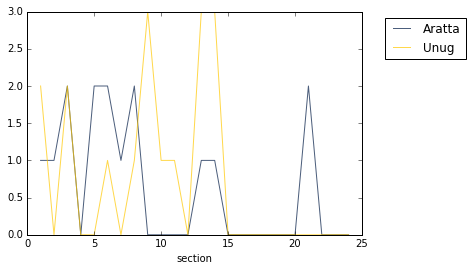

In [43]:
names_section_graph = proper_noun_by_section.with_column(
    'section', range(1, proper_noun_by_section.num_rows+1))

aratta_unug_section_graph = names_section_graph.select(['Aratta', 'Unug', 'section']).plot('section')
#notice Aratta is the only one mentioned in the section 4.2.3

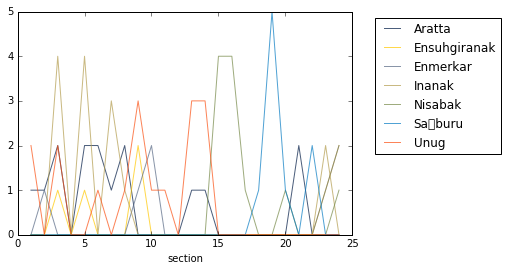

In [46]:
top_7_names_graph = names_section_graph.select(top_7_names + ['section']).plot('section')

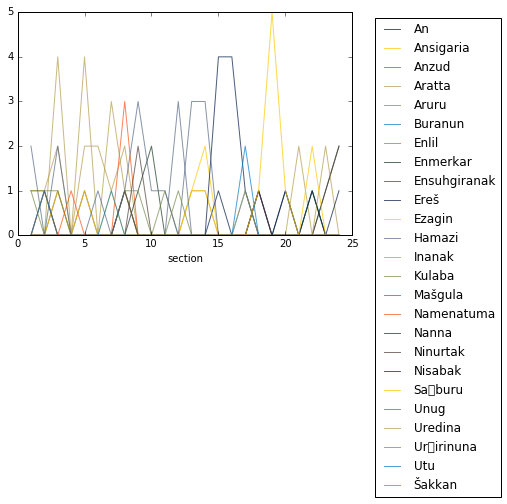

In [47]:
names_section_graph.plot('section')

Plot character arcs by line number

In [48]:
def noun_counts(noun, proper_nouns):
    noun_count = []
    for i in np.arange(len(proper_nouns)):
        noun_count.append(proper_nouns[i].count(noun))
    return noun_count

In [49]:
names_line_graph = Enmerkar_table.select(['l_no', 'proper_nouns'])
unique_nouns = list(set(list_flattening(names_line_graph.column('proper_nouns'))))
for i in np.arange(1, len(unique_nouns)+1):
    current_noun = unique_nouns[i-1]
    names_line_graph.append_column(current_noun, np.cumsum(noun_counts(current_noun, names_line_graph.column('proper_nouns'))))

names_line_graph = names_line_graph.drop('proper_nouns')

In [50]:
arrata_line_graph = names_line_graph.select(['l_no', 'Aratta'])
unug_line_graph = names_line_graph.select(['l_no', 'Unug'])

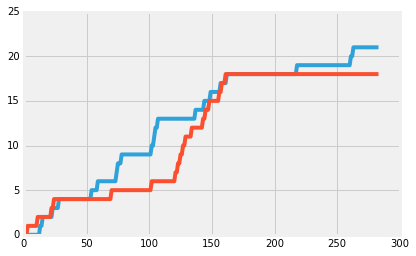

In [22]:
plt.plot(arrata_line_graph[0], arrata_line_graph[1])
plt.plot(unug_line_graph[0], unug_line_graph[1])